In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv("dataframe.csv")


In [3]:
# Define the selected features
features = [
    "T (K)", "d (mol/l)", "methane", "nitrogen", "CO2", "ethane", "propane",
    "ibutane", "butane", "ipentane", "pentane", "hexane", "heptane", "octane",
    "nonane", "decane", "H2S", "helium", "water", "oxygen", "argon", "hydrogen", "CO"
]
target = "z"

In [4]:
# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data[features], data[target], test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [5]:
# Remove rows with missing values from the training set
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]


In [6]:
# Remove rows with missing values from the validation set
X_val.dropna(axis=0, inplace=True)
y_val = y_val.loc[X_val.index]


In [7]:
# Remove rows with missing values from the testing set
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [8]:
# Remove rows with missing values from the validation set
X_val = X_val.dropna()
y_val = y_val.loc[X_val.index]

In [9]:
# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


In [10]:
# Transductive Support Vector Regression (TSVR)
svr = SVR(kernel='linear', C=1, epsilon=0.2)


In [11]:
# Fit the TSVR model using the training data
svr.fit(X_train, y_train)


SVR(C=1, epsilon=0.2, kernel='linear')

In [12]:
# Predict the labels of the testing data
predicted_labels = svr.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, predicted_labels)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_labels)
r2 = r2_score(y_test, predicted_labels)

In [14]:
# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 1.6292214841498207e-06
Root Mean Squared Error (RMSE): 0.0012764096067288983
Mean Absolute Error (MAE): 0.0009726832306911889
R-squared (R^2): -0.05709970856601787


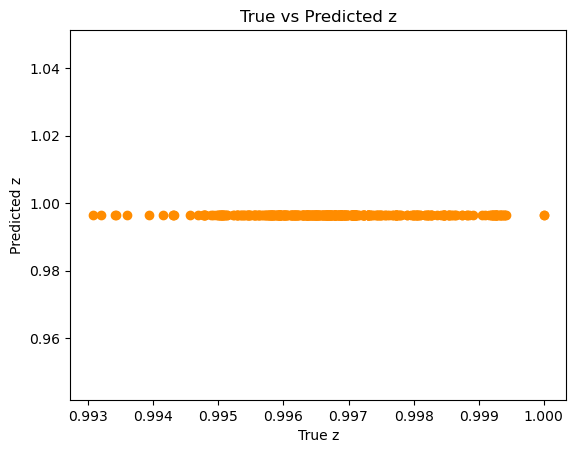

In [15]:
# Plot the results (optional)
plt.scatter(y_test, predicted_labels, color='darkorange')
plt.xlabel('True z')
plt.ylabel('Predicted z')
plt.title('True vs Predicted z')
plt.show()